<a href="https://colab.research.google.com/github/is0280fp/google_colab/blob/main/GaitRec_get_csv_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from IPython.core.debugger import Pdb; Pdb().set_trace()
import csv
import tensorflow as tf
import functools
import numpy as np

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_V_PRO_left.csv') as f:
    reader = csv.reader(f)
    V_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_V_PRO_right.csv') as f:
    reader = csv.reader(f)
    V_right = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_AP_PRO_left.csv') as f:
    reader = csv.reader(f)
    AP_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_AP_PRO_right.csv') as f:
    reader = csv.reader(f)
    AP_right = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_ML_PRO_left.csv') as f:
    reader = csv.reader(f)
    ML_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_ML_PRO_right.csv') as f:
    reader = csv.reader(f)
    ML_right = [row for row in reader]
f.close()

In [2]:
with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_metadata.csv') as f:
    reader = csv.reader(f)
    metadata = [row for row in reader]
f.close()

meta_items = np.array(metadata, dtype=str)[0,::]
metadata = np.array(metadata)[1:,::]

In [3]:
len(AP_left)
np.array(AP_left).shape
np.array(AP_left)[1:,::].shape

(75732, 104)

In [4]:
# データそれぞれの一番目の文字列を除去し、数字だけにした
V_right_items = np.array(V_right, dtype=str)[0,::]
V_right = np.array(V_right)[1:,::]
V_right = np.array(V_right, dtype=float)

V_left_items = np.array(V_left, dtype=str)[0,::]
V_left = np.array(V_left)[1:,::]
V_left = np.array(V_left, dtype=float)

AP_right_items = np.array(AP_right, dtype=str)[0,::]
AP_right = np.array(AP_right)[1:,::]
AP_right = np.array(AP_right, dtype=float)

AP_left_items = np.array(AP_left, dtype=str)[0,::]
AP_left = np.array(AP_left)[1:,::]
AP_left = np.array(AP_left, dtype=float)

ML_right_items = np.array(ML_right, dtype=str)[0,::]
ML_right = np.array(ML_right)[1:,::]
ML_right = np.array(ML_right, dtype=float)

ML_left_items = np.array(ML_left, dtype=str)[0,::]
ML_left = np.array(ML_left)[1:,::]
ML_left = np.array(ML_left, dtype=float) # ML_left.shape (75732, 104)

In [5]:
AP_left.shape

(75732, 104)

In [6]:
meta_items
SUBJECT_ID = 0
SESSION_ID = 1
CLASS_LABEL = 2
CLASS_LABEL_DETAILED = 3
SEX = 4
AGE = 5
HEIGHT = 6
BODY_WEIGHT = 7
BODY_MASS = 8
SHOE_SIZE = 9
AFFECTED_SIDE = 10
SHOD_CONDITION = 11
ORTHOPEDIC_INSOLE = 12
SPEED = 13
READMISSION = 14
SESSION_TYPE = 15
SESSION_DATE = 16
TRAIN = 17
TRAIN_BALANCED = 18
TEST = 19

In [7]:
metadata_len = len(metadata)

In [8]:
# meta = np.array(meta, dytpe=float) str型や日付など変換できない列があるので、逐次floatに変換忘れない
# metadataの前処理, 3(class_label_detail)と16(year.date)列目削除して
temp1_1 = np.concatenate([metadata[::, SUBJECT_ID].reshape(metadata_len, 1), metadata[::, SESSION_ID].reshape(metadata_len, 1)], axis=1)
temp1_2 = np.concatenate([metadata[::, CLASS_LABEL].reshape(metadata_len, 1), metadata[::, AFFECTED_SIDE].reshape(metadata_len, 1)], axis=1)
temp1_3 = np.concatenate([metadata[::, TRAIN].reshape(metadata_len, 1), metadata[::, TEST].reshape(metadata_len, 1)], axis=1)
temp2 = np.concatenate([temp1_1, temp1_2], axis=1)
metadata = np.concatenate([temp2, temp1_3], axis=1)

In [9]:
metadata.shape

(8971, 6)

In [10]:
# 2列目を5クラスに対応した数字に変換(HC=0, H=1, K=2, A=3, C=4)
metadata = np.where(metadata=='HC', 0, metadata)
metadata = np.where(metadata=='H', 1, metadata)
metadata = np.where(metadata=='K', 2, metadata)
metadata = np.where(metadata=='A', 3, metadata)
metadata = np.where(metadata=='C', 4, metadata)

In [11]:
metadata.shape[1]

6

In [12]:
# V_left_and_meta = []
# V_right_and_meta = []
# AP_left_and_meta = []
# AP_right_and_meta = []
# ML_left_and_meta = []
# ML_right_and_meta = []
# リストはramを食いすぎるので、np.arrayを使うことにした

TRIAL_num = len(AP_left)
metadata_for_GRF = np.zeros([TRIAL_num, metadata.shape[1]])
metadata_for_GRF[:,:] = np.nan # shape (8971, 6)

for i in range(metadata.shape[0]):
  index = np.array(np.where(AP_left[::, SESSION_ID] == int(metadata[i, SESSION_ID]))[0]) # 問題
  index = np.array(index)
  for k in index:
    # from IPython.core.debugger import Pdb; Pdb().set_trace()
    metadata_for_GRF[k, ::] = metadata[i, ::]


In [13]:
subject_id = 0
session_id = 1
class_label = 2
affected_side = 3
train = 4
test = 5

In [14]:
TRIAL_num

75732

In [15]:
metadata_for_GRF.shape

(75732, 6)

In [16]:
metadata_for_GRF[::, class_label]

array([4., 4., 4., ..., 0., 0., 0.])

In [17]:
print(np.sum(np.isnan(metadata_for_GRF))) # HCの場合、Affected_sideはNaN
print(np.array(np.where(metadata_for_GRF[::, class_label] == 0)).shape)


7755
(1, 7755)


In [18]:
# GRFをV,AP,MLの順に横に並べる
# AFFECTED_SIDEによって横に並ぶ順番を決める
# trainとtestデータにわける

V_left = V_left[::,3::]
V_right = V_right[::,3::]
AP_left = AP_left[::,3::]
AP_right = AP_right[::,3::]
ML_left = ML_left[::,3::]
ML_right = ML_right[::,3::]

# min_max normalizationする場合
from sklearn import preprocessing
mmscaler = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)
# mmscaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True) 

mmscaler.fit(V_left)           # 最大・最小を計算
V_left = mmscaler.transform(V_left) # 変換
mmscaler.fit(V_right)           # 最大・最小を計算
V_right = mmscaler.transform(V_right) # 変換

mmscaler.fit(ML_left)           # 最大・最小を計算
ML_left = mmscaler.transform(ML_left) # 変換
mmscaler.fit(V_right)           # 最大・最小を計算
ML_right = mmscaler.transform(ML_right) # 変換

mmscaler.fit(AP_left)           # 最大・最小を計算
AP_left = mmscaler.transform(AP_left) # 変換
mmscaler.fit(AP_right)           # 最大・最小を計算
AP_right = mmscaler.transform(AP_right) # 変換

In [19]:
V_left = V_left.reshape(V_left.shape[0], 1, V_left.shape[1])
V_right = V_right.reshape(V_right.shape[0], 1, V_right.shape[1])
AP_left = AP_left.reshape(AP_left.shape[0], 1, AP_left.shape[1])
AP_right = AP_right.reshape(AP_right.shape[0], 1, AP_right.shape[1])
ML_left = ML_left.reshape(ML_left.shape[0], 1, ML_left.shape[1])
ML_right = ML_right.reshape(ML_right.shape[0], 1, ML_right.shape[1])

In [20]:
# データのみ
right_GRF = np.concatenate([ML_right, AP_right, V_right], axis=2)
left_GRF = np.concatenate([ML_left, AP_left, V_left], axis=2)

In [21]:
print(right_GRF.shape)
right_GRF[0].shape

(75732, 1, 303)


(1, 303)

In [22]:
np.concatenate([right_GRF[0], left_GRF[0]], axis=1).shape

(1, 606)

In [23]:
# AFFECTED_SIDEによって横に並ぶ順番を決める
import random

GRF = []
for i in range(TRIAL_num):
  if metadata_for_GRF[i, class_label] > 0:    # patient
    if metadata_for_GRF[i, affected_side] == 0: # affected_leg is left
      # from IPython.core.debugger import Pdb; Pdb().set_trace()   
      GRF.append(np.concatenate([left_GRF[i], right_GRF[i]], axis=1))
    elif metadata_for_GRF[i, affected_side] == 1:  # affected_leg is right
      GRF.append(np.concatenate([right_GRF[i], left_GRF[i]], axis=1))
    else: 
      # from IPython.core.debugger import Pdb; Pdb().set_trace()                                 # affected_leg is both
      lst = []
      lst.append(right_GRF[i])
      lst.append(left_GRF[i])
      random.shuffle(lst)
      GRF.append(np.concatenate([np.array(lst[0]), np.array(lst[1])], axis=1)) 
  else:                                    # healthy control
    lst = []
    lst.append(right_GRF[0])
    lst.append(left_GRF[0])
    random.shuffle(lst)
    GRF.append(np.concatenate([np.array(lst[0]), np.array(lst[1])], axis=1)) 

print(np.array(GRF).shape)
GRF = np.array(GRF)
print(np.array(GRF).shape)

(75732, 1, 606)
(75732, 1, 606)


In [38]:
# trainとtestデータにわける
# この時点では、まだGRFとV_PRO_right_and_metaの順番は同じはず
# なのでこの時点で対応する正解データも作らないといけない

# 5クラス分類(HC vs H vs K vs A vs C)
train_data = []
train_data_label = []
test_data = []
test_data_label = []
for i in range(TRIAL_num):
  if metadata_for_GRF[i, test] == 1: # testデータかどうか
    test_data.append(GRF[i])
    test_data_label.append(metadata_for_GRF[i, class_label])
  else:
    train_data.append(GRF[i])
    train_data_label.append(metadata_for_GRF[i, class_label])

# 4クラス分類(H vs K vs A vs C)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     if metadata_for_GRF[i, class_label] == 1:
#       test_data.append(GRF[i])
#       test_data_label.append(1)
#     elif metadata_for_GRF[i, class_label] == 2: 
#       test_data.append(GRF[i])
#       test_data_label.append(2)
#     elif metadata_for_GRF[i, class_label] == 3: 
#       test_data.append(GRF[i])
#       test_data_label.append(3)
#     elif metadata_for_GRF[i, class_label] == 4: 
#       test_data.append(GRF[i])
#       test_data_label.append(4)
#   else:
#     if metadata_for_GRF[i, class_label] == 1:
#       train_data.append(GRF[i])
#       train_data_label.append(1)
#     elif metadata_for_GRF[i, class_label] == 2: 
#       train_data.append(GRF[i])
#       train_data_label.append(2)
#     elif metadata_for_GRF[i, class_label] == 3: 
#       train_data.append(GRF[i])
#       train_data_label.append(3)
#     elif metadata_for_GRF[i, class_label] == 4: 
#       train_data.append(GRF[i])
#       train_data_label.append(4)

# 2クラス分類(HC vs GD)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     test_data.append(GRF[i])
#     if metadata_for_GRF[i, class_label] > 0:
#       test_data_label.append(1)
#     else:
#       test_data_label.append(0)
#   else:
#     train_data.append(GRF[i])
#     if metadata_for_GRF[i, class_label] > 0:
#       train_data_label.append(1)
#     else:
#       train_data_label.append(0)

# 2クラス分類(HC vs H)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     if metadata_for_GRF[i, class_label] == 0:
#       test_data.append(GRF[i])
#       test_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 1: 
#       test_data.append(GRF[i])
#       test_data_label.append(1)
#   else:
#     if metadata_for_GRF[i, class_label] == 0:
#       train_data.append(GRF[i])
#       train_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 1: 
#       train_data.append(GRF[i])
#       train_data_label.append(1)

# 2クラス分類(HC vs K)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     if metadata_for_GRF[i, class_label] == 0:
#       test_data.append(GRF[i])
#       test_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 2: 
#       test_data.append(GRF[i])
#       test_data_label.append(1)
#   else:
#     if metadata_for_GRF[i, class_label] == 0:
#       train_data.append(GRF[i])
#       train_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 2: 
#       train_data.append(GRF[i])
#       train_data_label.append(1)

# 2クラス分類(HC vs A)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     if metadata_for_GRF[i, class_label] == 0:
#       test_data.append(GRF[i])
#       test_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 3: 
#       test_data.append(GRF[i])
#       test_data_label.append(1)
#   else:
#     if metadata_for_GRF[i, class_label] == 0:
#       train_data.append(GRF[i])
#       train_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 3: 
#       train_data.append(GRF[i])
#       train_data_label.append(1)

# 2クラス分類(HC vs C)
# train_data = []
# train_data_label = []
# test_data = []
# test_data_label = []
# for i in range(TRIAL_num):
#   if metadata_for_GRF[i, test] == 1: # testデータかどうか
#     if metadata_for_GRF[i, class_label] == 0:
#       test_data.append(GRF[i])
#       test_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 4: 
#       test_data.append(GRF[i])
#       test_data_label.append(1)
#   else:
#     if metadata_for_GRF[i, class_label] == 0:
#       train_data.append(GRF[i])
#       train_data_label.append(0)
#     elif metadata_for_GRF[i, class_label] == 4: 
#       train_data.append(GRF[i])
#       train_data_label.append(1)

train_X = np.array(train_data)
train_y = np.array(train_data_label)
test_X = np.array(test_data)
test_y = np.array(test_data_label)

In [33]:
# データセット内訳チェック
print(np.array(np.where(train_y == 0)).shape)
print(np.array(np.where(train_y == 1)).shape)
print(np.array(np.where(train_y == 2)).shape)
print(np.array(np.where(train_y == 3)).shape)
print(np.array(np.where(train_y == 4)).shape)

# NaNチェック
print(np.isnan(train_X).sum())
print(np.isnan(train_y).sum())
print(np.isnan(test_X).sum())
print(np.isnan(test_y).sum())

(1, 5563)
(1, 7900)
(1, 13341)
(1, 15213)
(1, 10728)
0
0
0
0


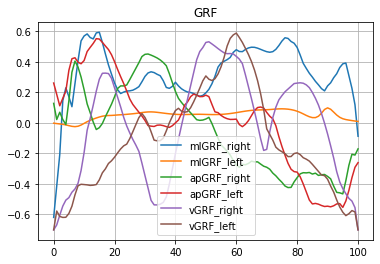

In [34]:
import matplotlib.pyplot as plt
plt.title('GRF')
plt.grid(True)

j = range(101)
# plt.plot(j, X[0, 0, 0:101], label="vGRF")

# plt.plot(j, X[0, 1, 0:101], label='apGRF')

# plt.plot(j, X[0, 2, 0:101], label='mlGRF')

plt.plot(j, train_X[0, 0, :101], label="mlGRF_right")
plt.plot(j, train_X[0, 0, 303:404], label="mlGRF_left")

plt.plot(j, train_X[0, 0, 101:202], label='apGRF_right')
plt.plot(j, train_X[0, 0, 404:505], label='apGRF_left')

plt.plot(j, train_X[0, 0, 202:303], label='vGRF_right')
plt.plot(j, train_X[0, 0, 505:606], label='vGRF_left')

plt.legend(loc='best')
plt.show()

In [27]:
import tensorflow as tf
from tensorflow.keras import optimizers, regularizers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Input, Reshape
from keras.layers.recurrent import LSTM
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
import time
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import seaborn as sns

# NAME = "HC-vs-C-LSTM_2class"
# NAME = "HC-vs-A-LSTM_2class"
# NAME = "HC-vs-K-LSTM_2class"
# NAME = "HC-vs-H-LSTM_2class"
# NAME = "HC-vs-GDs-LSTM_2class"
NAME = "HC-H-vs-K-vs-A-vs-C-LSTM_5class"
# NAME = "H-vs-K-vs-A-vs-C-CNN_4class"
# NAME = "HC-vs-Patients-CNN_5class"
# NAME = "HC-vs-GDs-CNN_2class"
# NAME = "HC-vs-H-CNN_2class"
# NAME = "HC-vs-K-CNN_2class"
# NAME = "HC-vs-A-CNN_2class"
# NAME = "HC-vs-C-CNN_2class"

# 学習
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        # patience=2,
                )

# checkpointの設定
checkpoint = ModelCheckpoint(
                    filepath="saved_model".format(NAME)",
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                )
# CNN
# model = Sequential()

# stddeviation = math.pow(606, -0.5)
# initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=stddeviation)

# # X = np.reshape(train_X, (-1, 101, 6))
# # validation_X = np.reshape(test_X, (-1, 101, 6))
# X = np.reshape(train_X, (-1, 606, 1))
# validation_X = np.reshape(test_X, (-1, 606, 1))

# model.add(Conv1D(24, kernel_size=8 , kernel_initializer=initializer, strides=2, input_shape=(606, 1)))
# model.add(Activation('relu'))
# # model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(24, kernel_size=8, strides=2))
# model.add(Activation('relu'))
# # model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(48, kernel_size=6, strides=3))
# model.add(Activation('relu'))
# # model.add(MaxPooling1D(pool_size=3))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# # # model.add(Dense(5)) # 5クラス分類
# # # model.add(Activation('softmax'))
# # model.add(Dense(4)) # 4クラス分類
# # model.add(Activation('softmax'))
# model.add(Dense(1)) # 2クラス分類
# model.add(Activation('sigmoid'))

#-----------------------------------------------------------------------------------------------------------------------------

# LSTM
model = Sequential()

X = np.reshape(train_X, (-1, 101, 6))
validation_X = np.reshape(test_X, (-1, 101, 6))

model.add(LSTM(units=101, input_shape=(101, 6), activation='tanh', dropout=0.5, return_sequences=True))
model.add(LSTM(units=101, input_shape=(101, 6), activation='tanh', dropout=0.5, return_sequences=False))

# model.add(Dense(units=5, activation='softmax'))
model.add(Dense(units=1, activation='sigmoid'))

#-----------------------------------------------------------------------------------------------------------------------------

# 共通

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# 5クラス分類, 4クラス分類
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer= optimizers.Adam(lr=0.002, beta_1= 0.9, beta_2= 0.999),
              metrics=['accuracy'],
              )

# 2クラス分類
# model.compile(loss='binary_crossentropy',
#               optimizer= optimizers.SGD(lr=5e-3),
#               metrics=['accuracy'],
#               )

model.summary()
model.fit(X, train_y,
          batch_size=5,
          epochs=2,
          validation_data=(validation_X, test_y),
          callbacks=[tensorboard, checkpoint])


# training parameters = kernel_size * (1Dだったらここは1, 2Dだったらここはkernel_size) * output_channels + num_bias
# 216 = 8 * 1 * 24 + 24

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 101, 101)          43632     
_________________________________________________________________
lstm_1 (LSTM)                (None, 101)               82012     
_________________________________________________________________
dense (Dense)                (None, 1)                 102       
Total params: 125,746
Trainable params: 125,746
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3781/3781 [==============================] - 71s 16ms/step - loss: 0.4692 - accuracy: 0.7719 - val_loss: 0.0359 - val_accuracy: 0.9923
Epoch 2/2
3781/3781 [==============================] - 61s 16ms/step - loss: 0.0815 - accuracy: 0.9693 - val_loss: 0.0181 - val_accuracy: 0.9940


In [48]:
# モデル復元

model = Sequential()

X = np.reshape(train_X, (-1, 101, 6))
validation_X = np.reshape(test_X, (-1, 101, 6))

model.add(LSTM(units=101, input_shape=(101, 6), activation='tanh', dropout=0.5, return_sequences=True))
model.add(LSTM(units=101, input_shape=(101, 6), activation='tanh', dropout=0.5, return_sequences=False))

model.add(Dense(units=5, activation='softmax'))
# model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer= optimizers.Adam(lr=0.002, beta_1= 0.9, beta_2= 0.999),
              metrics=['accuracy'],
              )

model.load_weights("/content/HC_vs_4classes_LSTM_12_27")

model.summary()
model.fit(X, train_y,
          batch_size=5,
          epochs=1,
          validation_data=(validation_X, test_y),
          callbacks=[tensorboard])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 101, 101)          43632     
_________________________________________________________________
lstm_23 (LSTM)               (None, 101)               82012     
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 510       
Total params: 126,154
Trainable params: 126,154
Non-trainable params: 0
_________________________________________________________________
10549/10549 [==============================] - 163s 15ms/step - loss: 1.0349 - accuracy: 0.5228 - val_loss: 1.0349 - val_accuracy: 0.4965


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[2192    0    0    0    0]
 [   1  145 3975  624  103]
 [   0  213 5214 1019   86]
 [   8   86 2704 2592  783]
 [  11   10  471 1481 1269]]
              precision    recall  f1-score   support

          HC       0.99      1.00      1.00      2192
         Hip       0.32      0.03      0.05      4848
        Knee       0.42      0.80      0.55      6532
       Ankle       0.45      0.42      0.44      6173
   Calcaneus       0.57      0.39      0.46      3242

    accuracy                           0.50     22987
   macro avg       0.55      0.53      0.50     22987
weighted avg       0.48      0.50      0.45     22987



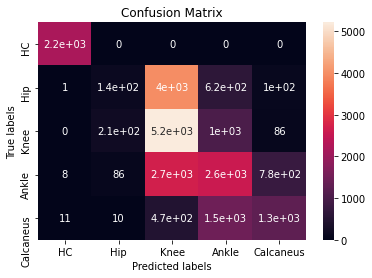

In [49]:
# 混合行列
predict_classes = model.predict_classes(validation_X)
true_classes = test_y
cmx = confusion_matrix(true_classes, predict_classes)
print(cmx)

index1 = ["HC", "Hip", "Knee", "Ankle", "Calcaneus"]
# index1 = ["HC", "Knee"]

print(classification_report(true_classes, predict_classes, target_names=index1))

ax= plt.subplot()
sns.heatmap(cmx, annot=True, ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(index1); 
ax.yaxis.set_ticklabels(index1);
plt.show()

In [50]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [51]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs